In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [3]:
train_labels[10]

3

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.0924 - acc: 0.9585 - val_loss: 1.2270 - val_acc: 0.7920
Epoch 2/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.0913 - acc: 0.9577 - val_loss: 1.2493 - val_acc: 0.7760
Epoch 3/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.0908 - acc: 0.9579 - val_loss: 1.1834 - val_acc: 0.7960
Epoch 4/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.0902 - acc: 0.9579 - val_loss: 1.2577 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.0901 - acc: 0.9570 - val_loss: 1.2696 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.0887 - acc: 0.9604 - val_loss: 1.2348 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.0859 - acc: 0.9597 - val_loss: 1.3146 - val_acc: 0.7860
Epoch 8

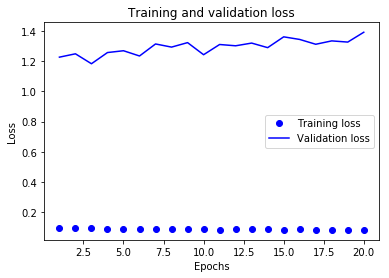

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

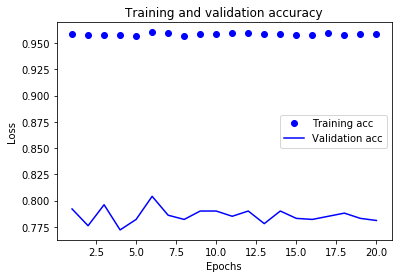

In [15]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
            model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 94us/step - loss: 2.6983 - acc: 0.5244 - val_loss: 1.8312 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 81us/step - loss: 1.4949 - acc: 0.6928 - val_loss: 1.3635 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 1s 82us/step - loss: 1.0956 - acc: 0.7628 - val_loss: 1.1740 - val_acc: 0.7380
Epoch 4/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.8594 - acc: 0.8186 - val_loss: 1.0697 - val_acc: 0.7700
Epoch 5/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.6855 - acc: 0.8611 - val_loss: 0.9788 - val_acc: 0.7860
Epoch 6/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.5455 - acc: 0.8887 - val_loss: 0.9277 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.4362 - acc: 0.9110 - val_loss: 0.9035 - val_acc: 0.8100
Epoch 8/9
7982

[0.9932897859456172, 0.7845057881207521]

In [23]:
import copy # randomly match labels

test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1856634016028495

In [24]:
predictions = model.predict(x_test)

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.8299 - acc: 0.6446 - val_loss: 1.1941 - val_acc: 0.7230
Epoch 2/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.9329 - acc: 0.8018 - val_loss: 0.9482 - val_acc: 0.7940
Epoch 3/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.6362 - acc: 0.8730 - val_loss: 0.8611 - val_acc: 0.8180
Epoch 4/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.4550 - acc: 0.9070 - val_loss: 0.8062 - val_acc: 0.8250
Epoch 5/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.3414 - acc: 0.9278 - val_loss: 0.7890 - val_acc: 0.8290
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.2656 - acc: 0.9407 - val_loss: 0.7980 - val_acc: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.2146 - acc: 0.9460 - val_loss: 0.8160 - val_acc: 0.8290
Epoch 